# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [1]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 3,
        'beta': 1,
        'decision_sparsity': 1,
        'fully_grown': True,
        'dt_type': 'vanilla', #'vanilla', 'SDT'
    },
    'data': {
        'number_of_variables': 10, 
        'num_classes': 2,
        'categorical_indices': [],
        
        'function_generation_type': 'random_decision_tree_trained', # 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 5000,
    }, 
    'computation':{
        'n_jobs': -3,
        'use_gpu': False,
        'gpu_numbers': '0',
        'RANDOM_SEED': 42,   
    }
}


In [2]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

## Imports

In [3]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from itertools import product       # forms cartesian products
from more_itertools import random_product 
from tqdm import tqdm
import pickle

import numpy as np

import pandas as pd
from joblib import Parallel, delayed

import random 
from random import sample 

import os
import sys

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from sympy import Symbol, sympify

        
import seaborn as sns
        
import random 

import warnings

from time import perf_counter



from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from IPython.display import Image

import numpy as np
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [4]:
#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################
os.environ['CUDA_VISIBLE_DEVICES'] = ''

sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [5]:
from utilities.utility_functions import *
#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['computation'])

#initialize_utility_functions_config_from_curent_notebook(config)

#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='data_creation'))
generate_directory_structure()

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)

In [6]:
print(path_identifier_function_data)

lNetSize5000_numDatasets5000_var10_class2_random_decision_tree_trained_xMax1_xMin0_xDistuniform_depth3_beta1_decisionSpars1_vanilla_fullyGrown


# Function Generation

In [7]:
#if max_distributions_per_class CHANGE NAME

In [8]:
if function_generation_type == 'random_decision_tree':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_random_decision_tree)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))
elif function_generation_type == 'random_decision_tree_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_random_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))  
elif function_generation_type == 'make_classification':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets)) 
elif function_generation_type == 'make_classification_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))    
elif function_generation_type == 'make_classification_distribution':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification_distribution)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets)) 
elif function_generation_type == 'make_classification_distribution_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_make_classification_distribution_decision_tree_trained)(config, seed=RANDOM_SEED+i) for i in range(number_of_generated_datasets))    
elif function_generation_type == 'distribtion':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_distribtion)(config, 
                                                              seed=RANDOM_SEED+i, 
                                                              max_distributions_per_class=max_distributions_per_class, 
                                                              random_parameters=random_parameters_distribution,
                                                              flip_percentage=0) for i in range(number_of_generated_datasets))    #, distribution_list = ['uniform']
elif function_generation_type == 'distribtion_trained':
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky')
    result_list = parallel(delayed(generate_data_distribtion_trained)(config, 
                                                                      seed=RANDOM_SEED+i, 
                                                                      max_distributions_per_class=max_distributions_per_class, 
                                                                      random_parameters=random_parameters_distribution,
                                                                      flip_percentage=0.2) for i in range(number_of_generated_datasets))    #, distribution_list = ['uniform']
    
    
function_identifier_list = generate_decision_tree_identifier(config)  
identifier_series_list = [pd.Series(result[0],  index=function_identifier_list) for result in result_list]

function_df = pd.DataFrame(data=np.array([result[0] for result in result_list]), columns=function_identifier_list)

X_data_list = [[identifier_series, pd.DataFrame(result[1], columns=['x' + str(i) for i in range(number_of_variables)])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_list = [[identifier_series, pd.DataFrame(result[2], columns=['result'])] for identifier_series, result in zip(identifier_series_list, result_list)]
y_data_raw_list = [[identifier_series, pd.DataFrame(result[3], columns=['result_raw'])] for identifier_series, result in zip(identifier_series_list, result_list)]
try:
    distribution_parameter_list_list =[[identifier_series, result[4]] for identifier_series, result in zip(identifier_series_list, result_list)]
except:
    pass


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 78 concurrent workers.
[Parallel(n_jobs=-3)]: Done 132 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-3)]: Done 356 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-3)]: Done 644 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-3)]: Done 996 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-3)]: Done 1412 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-3)]: Done 1892 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-3)]: Done 2436 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-3)]: Done 3044 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-3)]: Done 3716 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-3)]: Done 4452 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-3)]: Done 5000 out of 5000 | elapsed:   39.4s finished


In [9]:
function_df.head(20)

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,split0,split1,split2,split3,split4,split5,split6,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7
0,0.020,0.829,0.996,0.608,0.432,0.715,0.302,7.000,4.000,7.000,3.000,5.000,8.000,9.000,0.812,0.538,0.000,0.600,0.504,0.455,0.250,0.944
1,0.083,0.536,0.987,0.019,0.641,0.441,0.995,2.000,9.000,8.000,7.000,5.000,8.000,8.000,1.000,0.351,0.564,0.325,0.526,0.476,0.821,0.519
2,0.007,0.147,0.801,0.005,0.895,0.495,0.069,3.000,0.000,4.000,3.000,4.000,6.000,5.000,1.000,0.250,0.037,1.000,0.472,0.517,0.716,0.545
3,0.386,0.014,0.334,0.789,0.145,0.651,0.888,5.000,9.000,0.000,8.000,1.000,4.000,3.000,0.172,0.600,0.384,0.469,0.432,0.541,0.517,0.644
4,0.360,0.353,0.985,0.997,0.979,0.973,0.083,9.000,9.000,7.000,5.000,3.000,7.000,0.000,0.517,1.000,0.789,0.000,0.481,0.692,1.000,0.250
5,0.534,0.062,0.911,0.796,0.986,0.535,0.914,5.000,4.000,7.000,9.000,9.000,5.000,7.000,0.427,0.212,0.481,0.710,1.000,0.532,0.000,0.439
6,0.376,0.837,0.622,0.021,0.071,0.835,0.048,3.000,4.000,3.000,3.000,5.000,7.000,0.000,0.333,0.525,0.913,0.588,0.462,0.351,0.639,0.503
7,0.016,0.507,0.706,0.521,0.847,0.037,0.115,9.000,5.000,0.000,4.000,5.000,4.000,8.000,0.667,1.000,0.407,0.833,0.645,0.506,0.583,0.456
8,0.716,0.260,0.044,0.222,0.696,0.022,0.784,2.000,1.000,4.000,1.000,2.000,1.000,2.000,0.505,0.641,0.478,0.310,0.000,0.804,0.606,0.503
9,0.105,0.367,0.492,0.120,0.728,0.979,0.064,1.000,8.000,7.000,9.000,5.000,4.000,0.000,0.615,0.292,0.540,0.341,0.514,0.765,0.366,0.486


In [10]:
X_data_list[0][0].head(10)

feat0    0.020
feat1    0.829
feat2    0.996
feat3    0.608
feat4    0.432
feat5    0.715
feat6    0.302
split0   7.000
split1   4.000
split2   7.000
dtype: float64

In [11]:
X_data_list[0][1].head(10)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.915,0.857,0.503,0.326,0.564,0.039,0.893,0.125,0.586,0.674
1,0.981,0.137,0.966,0.626,0.253,0.190,0.697,0.812,0.729,0.937
2,0.656,0.758,0.578,0.456,0.118,0.285,0.702,0.135,0.314,0.176
3,0.897,0.646,0.026,0.168,0.715,0.294,0.559,0.219,0.365,0.092
4,0.885,0.515,0.669,0.348,0.468,0.226,0.132,0.257,0.666,0.395
5,0.646,0.285,0.332,0.848,0.966,0.815,0.428,0.742,0.197,0.619
6,0.247,0.021,0.183,0.905,0.757,0.620,0.291,0.816,0.479,0.720
7,0.769,0.759,0.509,0.488,0.041,0.303,0.921,0.538,0.305,0.053
8,0.540,0.461,0.329,0.936,0.891,0.733,0.789,0.875,0.136,0.777
9,0.182,0.308,0.445,0.509,0.661,0.030,0.793,0.545,0.637,0.869


In [12]:
y_data_list[0][0].head(10)

feat0    0.020
feat1    0.829
feat2    0.996
feat3    0.608
feat4    0.432
feat5    0.715
feat6    0.302
split0   7.000
split1   4.000
split2   7.000
dtype: float64

In [13]:
y_data_list[1][1].head(10)

,result
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,1


In [14]:
y_data_list[2][1].head(10)

,result
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,1


In [15]:
y_data_raw_list[2][1].head(10)

,result_raw
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,1


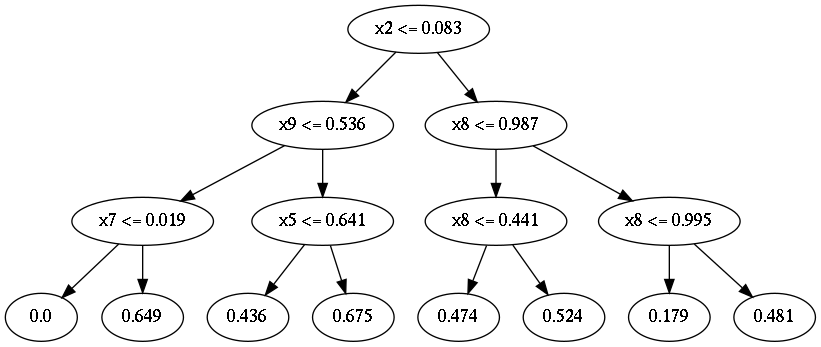

In [16]:
plot_tree_from_parameters(y_data_list[1][0].values, config) ##for lp0 to lp7 we subtract the result from one!

In [17]:
path_functions = './data/saved_function_lists/functions_' + path_identifier_function_data + '.csv'
function_df.to_csv(path_functions, index=False)

path_X_data = './data/saved_function_lists/X_data_' + path_identifier_function_data + '.pkl'
with open(path_X_data, 'wb') as f:
    pickle.dump(X_data_list, f)
path_y_data = './data/saved_function_lists/y_data_' + path_identifier_function_data + '.pkl'
with open(path_y_data, 'wb') as f:
    pickle.dump(y_data_list, f)

try:
    path_distribution = './data/saved_function_lists/distribution_parameter_list_list_' + path_identifier_function_data + '.pkl'
    with open(path_distribution, 'wb') as f:
        pickle.dump(distribution_parameter_list_list, f)
except:
    pass